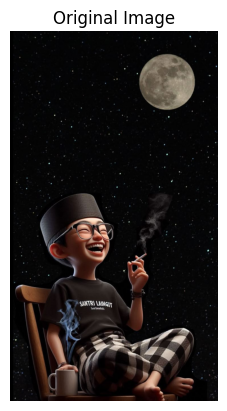

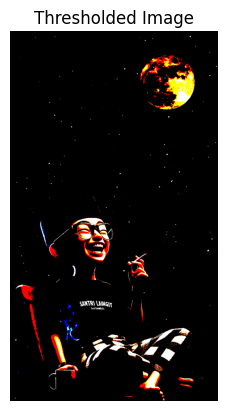

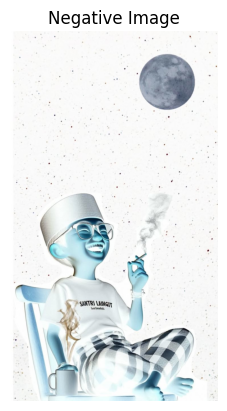

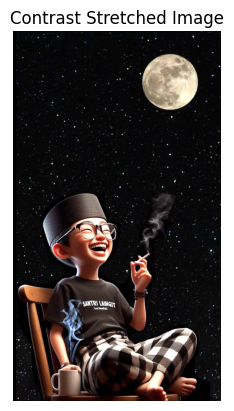

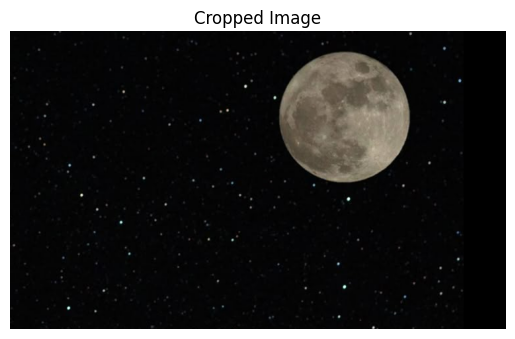

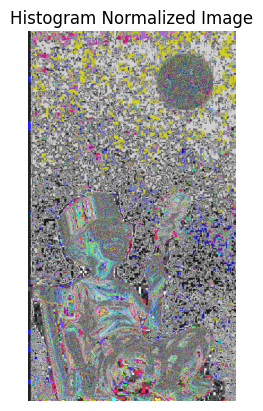

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membaca dan menampilkan citra
def read_image(image_path):
    return Image.open(image_path)

def show_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Segmentasi menggunakan image thresholding
def image_thresholding(image, threshold=128):
    image_array = np.array(image)
    binary_image = np.where(image_array > threshold, 255, 0)
    return Image.fromarray(binary_image.astype(np.uint8))

# 2. Mengubah citra menjadi image negative
def image_negative(image):
    image_array = np.array(image)
    negative_image = 255 - image_array
    return Image.fromarray(negative_image.astype(np.uint8))

# 3. Meningkatkan kontras citra (contrast stretching)
def contrast_stretching(image):
    image_array = np.array(image, dtype=np.float32)
    min_val = np.percentile(image_array, 2)  # Menghindari outlier
    max_val = np.percentile(image_array, 98)

    stretched_image = (image_array - min_val) * (255 / (max_val - min_val))
    stretched_image = np.clip(stretched_image, 0, 255)  # Hindari nilai di luar range

    return Image.fromarray(stretched_image.astype(np.uint8))

# 4. Cropping citra menggunakan image subtraction
def image_cropping(image, x1, y1, x2, y2):
    return image.crop((x1, y1, x2, y2))

# 5. Normalisasi histogram dari citra
def histogram_normalization(image):
    image_array = np.array(image)
    hist, bins = np.histogram(image_array.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    normalized_image = np.interp(image_array.flatten(), bins[:-1], cdf_normalized)
    normalized_image = normalized_image.reshape(image_array.shape)
    return Image.fromarray(normalized_image.astype(np.uint8))

# Main program
if __name__ == "__main__":
    image_path = 'kopimalam.jpeg'
    image = read_image(image_path)

    # Tampilkan citra asli
    show_image(image, "Original Image")

    # 1. Segmentasi menggunakan image thresholding
    thresholded_image = image_thresholding(image)
    show_image(thresholded_image, "Thresholded Image")

    # 2. Mengubah citra menjadi image negative
    negative_image = image_negative(image)
    show_image(negative_image, "Negative Image")

    # 3. Meningkatkan kontras citra
    stretched_image = contrast_stretching(image)
    show_image(stretched_image, "Contrast Stretched Image")

    # 4. Cropping citra
    cropped_image = image_cropping(image, 50, 50, 800, 500)
    show_image(cropped_image, "Cropped Image")

    # 5. Normalisasi histogram
    normalized_image = histogram_normalization(image)
    show_image(normalized_image, "Histogram Normalized Image")